In [1]:
import numpy as np
import networkx as nx

# DAGs - no. of paths of length $k$


For adjacency matrix $A$, representimng a DAG $G$, no. of paths between nodes $i$ and $j$ of length $k$ can be identified by raising $A$ to the power of $k$:

$$\Large A^k_{ij} = \text{no. of paths of len $k$ from $i$ to $j$}$$

In [39]:
def get_n_paths_of_len_k(graph, node_0, node_1, k):
    
    """Computes a number ogf paths of len k between nodes i and j"""
    
    A = nx.linalg.graphmatrix.adjacency_matrix(graph).todense()
    paths_k = np.linalg.matrix_power(A, k)
    
    return paths_k[node_0, node_1]

## Build a graph

In [40]:
# Create a graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(np.arange(6))

# Add edges
G.add_edges_from(
    [
        (0, 1),
        (0, 3),
        (0, 5),
        (1, 2),
        (2, 5),
        (3, 4),
        (4, 5)
    ]
)

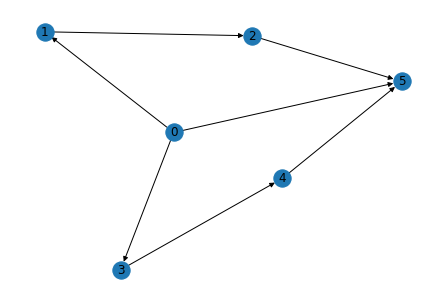

In [41]:
# Plot the graph
nx.draw(G, with_labels=True)

In [42]:
# Get the adjacency matrix
A = nx.linalg.graphmatrix.adjacency_matrix(G).todense()
A

matrix([[0, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0]], dtype=int32)

We expect to have $2$ paths of length $3$ from node $0$ to node $5$. Let's check it:

In [43]:
get_n_paths_of_len_k(
    graph=G, 
    node_0=0, 
    node_1=5, 
    k=3
)

2

$G$ is directed, so we expect to have one path of len $2$ from node $3$ to node $5$:

In [45]:
get_n_paths_of_len_k(
    graph=G, 
    node_0=3, 
    node_1=5, 
    k=2
)

1